In [1]:
import numpy as np
import pandas as pd
import seaborn; seaborn.set()
from pmdarima import auto_arima
from pathlib import Path
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import matplotlib.pylab as plt

In [2]:
bitcoin_df = pd.read_csv('Resources/ETH-USD-monthly.csv',index_col='Date', parse_dates= True)
bitcoin_df.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-01,7.982310,11.890900,7.982310,10.727500,10.727500,521748480
2017-02-01,10.741300,16.059401,10.551900,15.817200,15.817200,467166760
2017-03-01,15.847200,55.114700,15.558900,50.037300,50.037300,4324810304
2017-04-01,50.033699,79.021202,40.901100,79.021202,79.021202,3154319672
2017-05-01,79.321602,236.964996,73.086601,230.669006,230.669006,14679954720


In [3]:
bitcoin_df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [4]:
bitcoin_df = bitcoin_df.drop(columns=['Open','High','Low','Adj Close','Volume'])

In [5]:
bitcoin_df.head(10)

,Close
Date,
2017-01-01,10.727500
2017-02-01,15.817200
2017-03-01,50.037300
2017-04-01,79.021202
2017-05-01,230.669006
2017-06-01,294.915985
2017-07-01,203.871002
2017-08-01,383.041992
2017-09-01,301.464996


In [6]:
bitcoin_df.dtypes

Close    float64
dtype: object

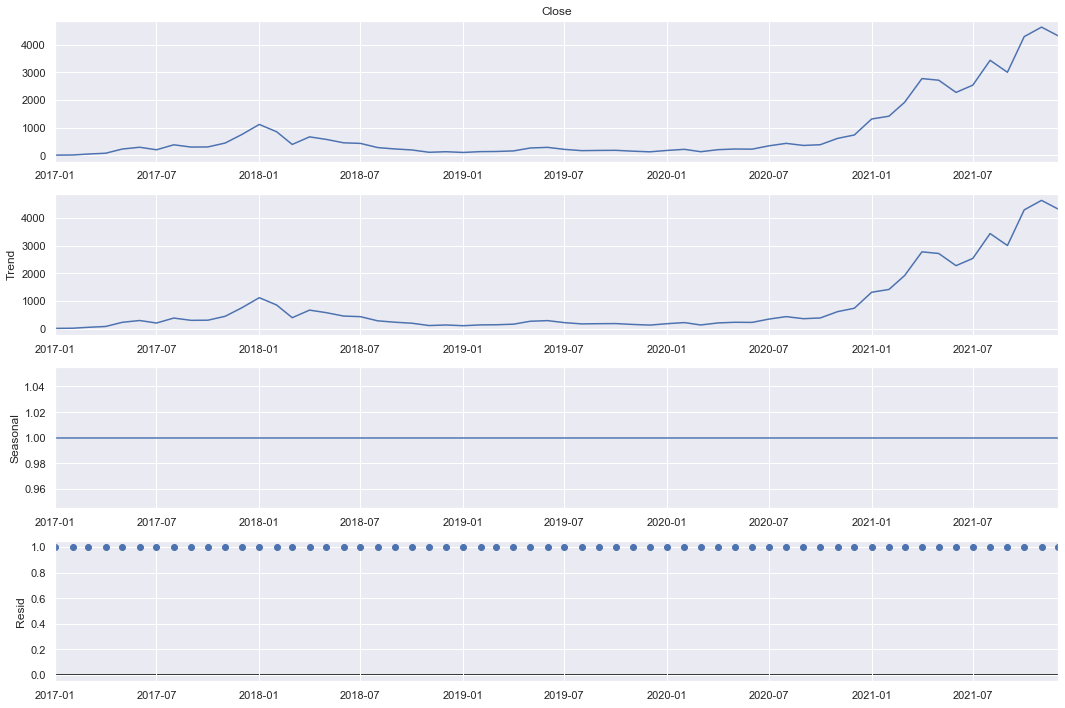

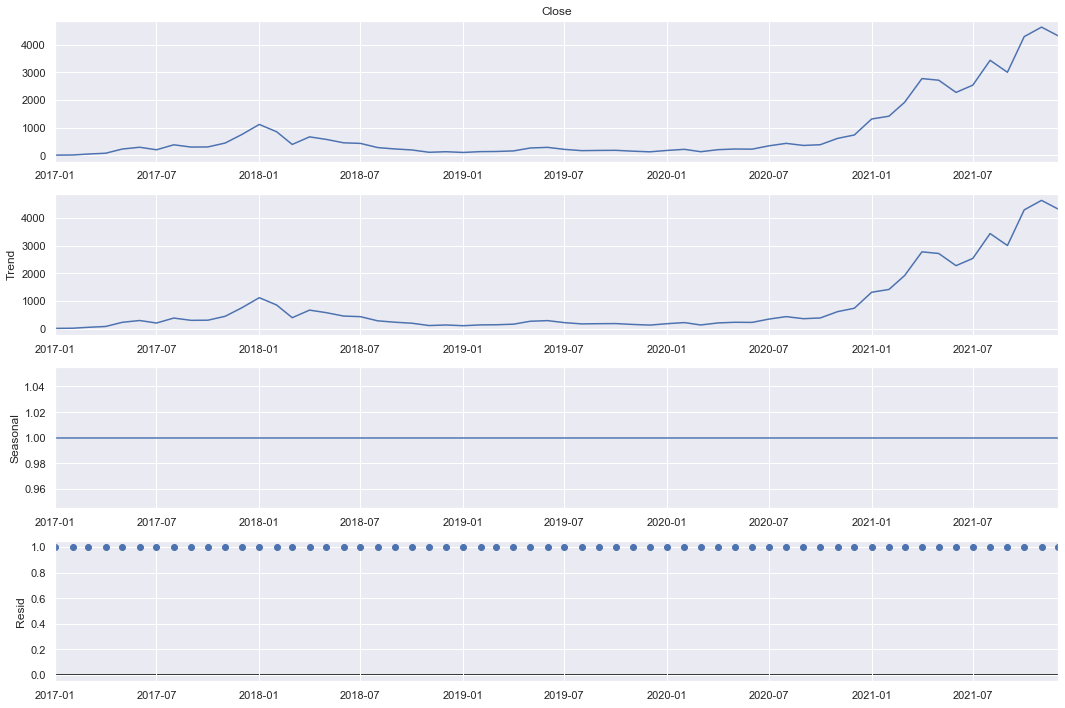

In [7]:
results = seasonal_decompose(bitcoin_df['Close'],model ='multiplicative',period=1)
plt.rcParams.update({'figure.figsize': (15,10)})
results.plot()

In [8]:
#Arima
import warnings
warnings.filterwarnings("ignore")

# Fit auto_arima function to AirPassengers dataset
stepwise_fit = auto_arima(bitcoin_df['Close'], start_p = 1, start_q = 1,
max_p = 3, max_q = 3, m = 12,
start_P = 0, seasonal = True,
d = None, D = 1, trace = True,
error_action ='ignore', # we don't want to know if an order does not work
suppress_warnings = True, # we don't want convergence warnings
stepwise = True)# set to stepwise

# To print the summary
stepwise_fit.summary()


Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,1,1)[12]             : AIC=673.812, Time=0.16 sec
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=700.944, Time=0.01 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=691.661, Time=0.09 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=672.966, Time=0.12 sec
 ARIMA(0,2,1)(0,1,0)[12]             : AIC=672.064, Time=0.03 sec
 ARIMA(0,2,1)(1,1,0)[12]             : AIC=673.044, Time=0.12 sec
 ARIMA(0,2,1)(1,1,1)[12]             : AIC=674.955, Time=0.18 sec
 ARIMA(1,2,1)(0,1,0)[12]             : AIC=672.979, Time=0.07 sec
 ARIMA(0,2,2)(0,1,0)[12]             : AIC=672.034, Time=0.07 sec
 ARIMA(0,2,2)(1,1,0)[12]             : AIC=672.516, Time=0.14 sec
 ARIMA(0,2,2)(0,1,1)[12]             : AIC=672.659, Time=0.15 sec
 ARIMA(0,2,2)(1,1,1)[12]             : AIC=674.502, Time=0.23 sec
 ARIMA(1,2,2)(0,1,0)[12]             : AIC=inf, Time=0.09 sec
 ARIMA(0,2,3)(0,1,0)[12]             : AIC=671.877, Time=0.07 sec
 ARIMA(0,2,3)(1,1,0)[12]             

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   60
Model:             SARIMAX(0, 2, 3)x(1, 1, [], 12)   Log Likelihood                -330.828
Date:                             Tue, 07 Dec 2021   AIC                            671.656
Time:                                     23:26:04   BIC                            680.799
Sample:                                          0   HQIC                           675.081
                                              - 60                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0766      0.125     -8.585      0.000      -1.322      -0.831
ma.L2         -0.0610      0.175     -0.347      0.728      -0.405       0.283
ma.L3          0.2989      0.123      2.425      0.015       0.057       0.540
ar.S.L12      -0.3680      0.414     -0.888      0.374      -1.180       0.444
sigma2      9.783e+04    1.9e+04      5.140      0.000    6.05e+04    1.35e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.65   Jarque-Bera (JB):                 7.41
Prob(Q):                              0.42   Prob(JB):                         0.02
Heteroskedasticity (H):               4.22   Skew:                             0.45
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [9]:
# Split data into train / test sets
train = bitcoin_df.iloc[:len(bitcoin_df)-12]
test = bitcoin_df.iloc[len(bitcoin_df)-12:] # set one year(12 months) for testing

# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['Close'],
order = (0, 1, 1),
seasonal_order =(2, 1, 1, 12))

result = model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                   48
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -225.226
Date:                            Tue, 07 Dec 2021   AIC                            460.451
Time:                                    23:26:05   BIC                            468.228
Sample:                                01-01-2017   HQIC                           463.136
                                     - 12-01-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0567      0.257     -0.220      0.826      -0.561       0.448
ar.S.L12      -0.9859     31.146     -0.032      0.975     -62.030      60.059
ar.S.L24      -0.7648     18.713     -0.041      0.967     -37.442      35.912
ma.S.L12      -0.4003    143.318     -0.003      0.998    -281.298     280.498
sigma2      8107.0296   6.26e+05      0.013      0.990   -1.22e+06    1.23e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.14
Prob(Q):                              0.95   Prob(JB):                         0.93
Heteroskedasticity (H):               0.57   Skew:                             0.09
Prob(H) (two-sided):                  0.35   Kurtosis:                         2.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

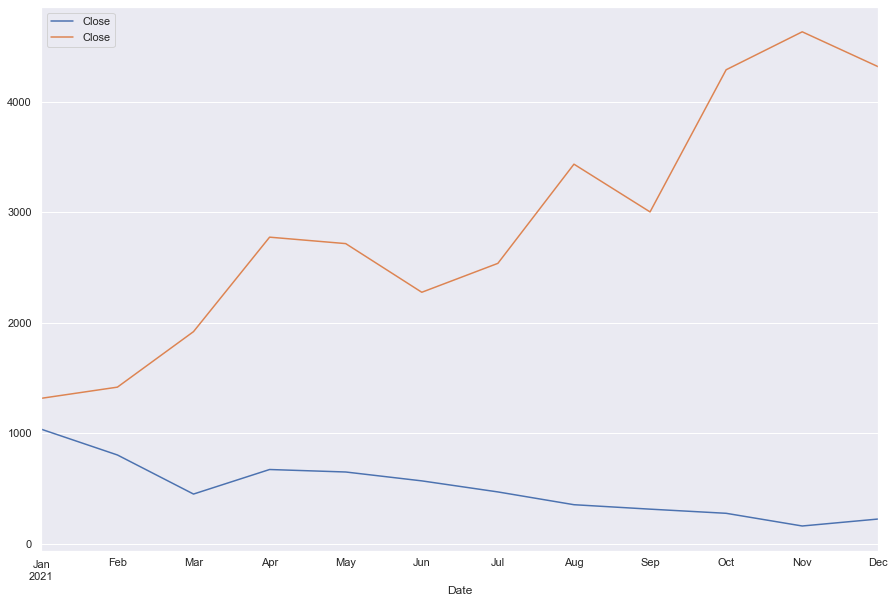

In [10]:
#Predictions of ARIMA Model agains the Test set
start = len(train)
end = len(train) + len(test) - 1

# Predictions for one-year against the test set
predictions = result.predict(start, end,typ = 'levels').rename("Close")

# plot predictions and actual values
predictions.plot(legend = True)
test['Close'].plot(legend = True)


In [11]:
#Evaluate the model using MSE and RMSE
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Calculate root mean squared error
rmse(test["Close"], predictions)

2709.315526546093

In [12]:
# Calculate mean squared error
mean_squared_error(test["Close"], predictions)

7340390.622383735

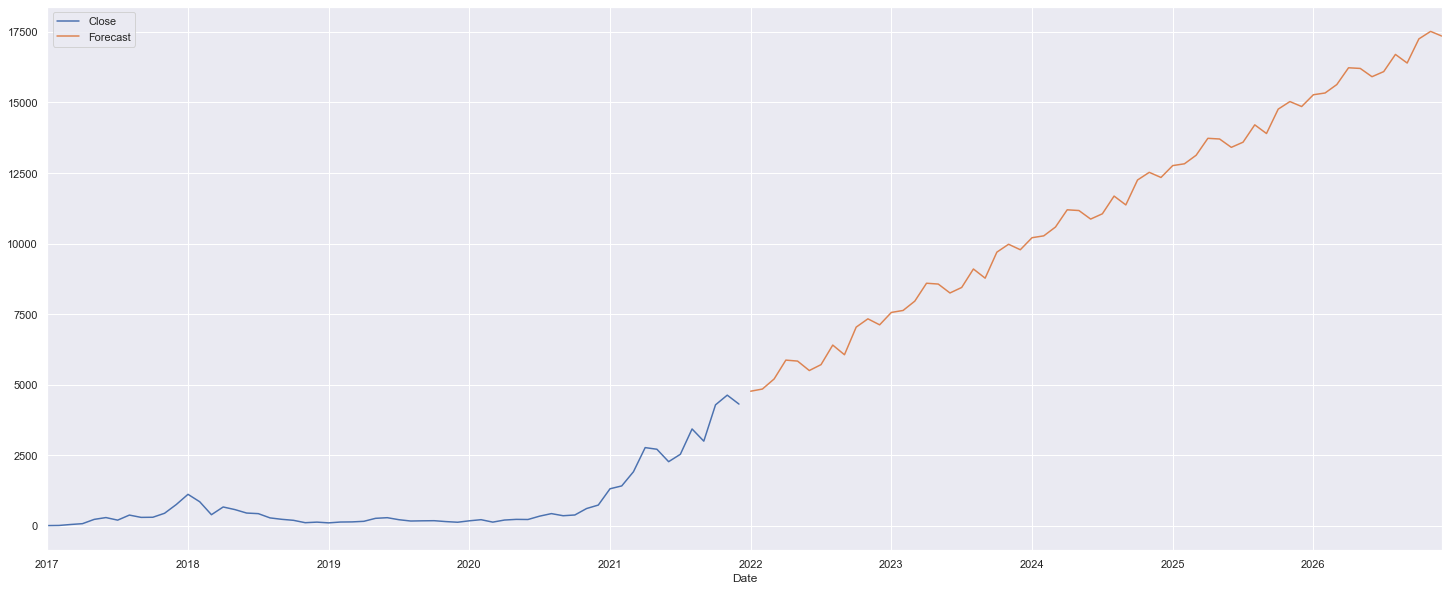

In [13]:
# Train the model on the full dataset
model = model = SARIMAX(bitcoin_df['Close'],order = (0, 1, 1),seasonal_order =(2, 1, 1, 12))
result = model.fit()

# Forecast for the next 20 years
forecast = result.predict(start = len(bitcoin_df),end = (len(bitcoin_df)-1) + 5 * 12,typ = 'levels').rename('Forecast')

# Plot the forecast values
bitcoin_df['Close'].plot(figsize = (25, 10), legend = True)
forecast.plot(legend = True)
